<a href="https://colab.research.google.com/github/a-memme/Text_Analysis_Reddit/blob/main/Reddit_Topic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dependencies**

In [1]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import praw
from getpass import getpass

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)

# **PRAW**
- Access Reddit data via PRAW wrapper and analyze posts

In [3]:
#Store Reddit username
user = getpass('')

#Store Client ID
client_id = getpass('')

#Store Client Secret
client_secret = getpass('')

··········
··········
··········


In [4]:
#Configure
reddit = praw.Reddit (
                      client_id=client_id,
                      client_secret=client_secret,
                      user_agent=user
                     )

In [5]:
#Test connection
subreddit = reddit.subreddit('AmItheAsshole')
print(subreddit.display_name)

AmItheAsshole


In [6]:
print(subreddit.description)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



#Welcome to r/AmITheAsshole!

A catharsis for the frustrated moral philosopher in all of us, and a place to finally find out if you were wrong in a real-world argument that's been bothering you. Tell us about any non-violent conflict you have experienced; give us both sides of the story, and find out if you're right, or you're the asshole.

This is the sub to lay out your  actions and conflicts and get impartial judgment rendered against you.  Were you the asshole in that situation or not? Post should reflect real situations, and abide by the rules below.

After 18 hours, your post will be given a flair representing the final judgment on your matter.  This flair is determined by the subscribers who have both rendered judgment and voted on which judgment is best.  ***The power of the crowd will judge you***.  If your top level comment has the highest number of upvotes in a thread, you will get a flair point. More details are listed in [our FAQ](https://www.reddit.com/r/AmItheAsshole/wik

In [7]:
#Function for retrieving top posts
def get_posts(subreddit_name):

  #Lists
  title_list = []
  score_list = []
  num_comments_list = []
  url_list = []
  up_list = []
  down_list = []
  upvote_ratio_list = []

  subreddit = reddit.subreddit(subreddit_name)
  # Get the top posts from the subreddit - can toggle between top vs hot option (for our case, we want to cast a larger net and therefore go for top)
  top_posts = subreddit.top(limit=1000, time_filter='year')
  #top_posts = subreddit.hot(limit=1000)

  # Process top posts
  for post in top_posts:
    # Accessing different metrics of interest
    title = post.title
    score = post.score
    num_comments = post.num_comments
    upvote_ratio = post.upvote_ratio
    ups = post.ups
    downs = post.downs

    # post conditionals
    if score >= 10000 and num_comments >= 100:
      title_list.append(title)
      score_list.append(score)
      num_comments_list.append(num_comments)
      url_list.append(post.url)
      up_list.append(ups)
      down_list.append(downs)
      upvote_ratio_list.append(upvote_ratio)


  #Create dataframe
  aita_df = pd.DataFrame({'post': title_list,
                         'score': score_list,
                         'number_of_comments': num_comments_list,
                         'url': url_list,
                         "ups": up_list,
                         "downs": down_list,
                         'upvote_ratio': upvote_ratio_list
                         })

  return aita_df

In [8]:
aita_df = get_posts('AmItheAsshole')

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [9]:
#Visualize top posts by score (same as up count)
aita_df.sort_values(['score'], ascending=False).head(50)

,post,score,number_of_comments,url,ups,downs,upvote_ratio
0,AITA for bringing my SIL’s wallet to the restaurant when she conveniently always forgets it?,69783,3816,https://www.reddit.com/r/AmItheAsshole/comments/x2k5kv/aita_for_bringing_my_sils_wallet_to_the/,69783,0,0.98
1,"AITA for bringing up my brother's ""premature"" birth at Christmas dinner to get my parents to shut up?",60424,3359,https://www.reddit.com/r/AmItheAsshole/comments/zvmflw/aita_for_bringing_up_my_brothers_premature_birth/,60424,0,0.94
2,AITA for not taking down my video that was a gift from my best man.,55742,6076,https://www.reddit.com/r/AmItheAsshole/comments/wyjbjs/aita_for_not_taking_down_my_video_that_was_a_gift/,55742,0,0.98
3,"AITA for dropping our dinner on the ground and walking out when my boyfriend asked me ""What's for dinner tonight, b*tch?""",50607,1812,https://www.reddit.com/r/AmItheAsshole/comments/xbn2n0/aita_for_dropping_our_dinner_on_the_ground_and/,50607,0,0.92
4,"AITA for getting up from my chair in the middle of christmas dinner and shouting ""SHUT THE FUCK UP ABOUT MY BODYYYYY"" in response to my husband's observation?",49955,2473,https://www.reddit.com/r/AmItheAsshole/comments/zz5str/aita_for_getting_up_from_my_chair_in_the_middle/,49955,0,0.85
5,AITA for silently getting up and walking out of the restaurant during NYE dinner after I was told to pay for everyone at the table (my inlaws)?,48170,5942,https://www.reddit.com/r/AmItheAsshole/comments/100ogg4/aita_for_silently_getting_up_and_walking_out_of/,48170,0,0.90
6,AITA for kicking out one of my bridesmaids for showing up in the wrong dress?,45539,5460,https://www.reddit.com/r/AmItheAsshole/comments/10av2g7/aita_for_kicking_out_one_of_my_bridesmaids_for/,45539,0,0.92
7,"AITA for how I fought my boyfriend's medical bill, going ""too far""?",45139,6289,https://www.reddit.com/r/AmItheAsshole/comments/zdk3bq/aita_for_how_i_fought_my_boyfriends_medical_bill/,45139,0,0.96
8,AITA for saying I'll be driving myself and paying for my own room on the upcoming family vacation so I won't have to be a babysitter?,45040,7179,https://www.reddit.com/r/AmItheAsshole/comments/13savby/aita_for_saying_ill_be_driving_myself_and_paying/,45040,0,0.98
9,AITA for refusing to tell my husband the gender of our baby after he skipped going to the dr appointment with me?,43630,2256,https://www.reddit.com/r/AmItheAsshole/comments/101hya0/aita_for_refusing_to_tell_my_husband_the_gender/,43630,0,0.86


# **Keywords vs Tokenizing**

## **Lemmatizing & Tokenizing**

In [10]:
# Libraries for text preprocessing
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
!pip install gensim
import gensim
from gensim.parsing.preprocessing import remove_stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [11]:
# Lemmatizing/Tokenizing Functions
#Configure
def get_wordnet_pos(word):
# Map tag to the first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

#Tokenizing titles - only keep tokens with >2 character length
def tokens(tag):
    tag = remove_stopwords(tag) # remove stopwords with Gensim

    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(tag)]

    # remove left over stop words with nltk
    tokenized = [token for token in tokenized if token not in stopwords.words("english")]

    # remove non-alpha characters and keep the words of length >2 only
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]

    return tokenized

In [12]:
#Create new df for breaking down the titles (into tokens & eventually keywords)
keyword_df = aita_df.loc[:, ['post']]

#Format keyword column and tokenize
keyword_df['lower'] = keyword_df['post'].str.lower()
keyword_df['lower'] = keyword_df['lower'].str.replace('aita', '')
keyword_df['tokens'] = keyword_df['lower'].apply(lambda x: tokens(x))

In [13]:
keyword_df

,post,lower,tokens
0,AITA for bringing my SIL’s wallet to the restaurant when she conveniently always forgets it?,for bringing my sil’s wallet to the restaurant when she conveniently always forgets it?,"[bring, sil, wallet, restaurant, conveniently, forgets]"
1,"AITA for bringing up my brother's ""premature"" birth at Christmas dinner to get my parents to shut up?","for bringing up my brother's ""premature"" birth at christmas dinner to get my parents to shut up?","[bring, brother, premature, birth, christmas, dinner, parent, shut]"
2,AITA for not taking down my video that was a gift from my best man.,for not taking down my video that was a gift from my best man.,"[take, video, gift, best, man]"
3,"AITA for dropping our dinner on the ground and walking out when my boyfriend asked me ""What's for dinner tonight, b*tch?""","for dropping our dinner on the ground and walking out when my boyfriend asked me ""what's for dinner tonight, b*tch?""","[drop, dinner, ground, walk, boyfriend, ask, dinner, tonight, tch]"
4,"AITA for getting up from my chair in the middle of christmas dinner and shouting ""SHUT THE FUCK UP ABOUT MY BODYYYYY"" in response to my husband's observation?","for getting up from my chair in the middle of christmas dinner and shouting ""shut the fuck up about my bodyyyyy"" in response to my husband's observation?","[get, chair, middle, christmas, dinner, shout, shut, fuck, bodyyyyy, response, husband, observation]"
...,...,...,...
993,AITA for telling the truth about my eighteenth birthday and embarrassing my father to his university friends?,for telling the truth about my eighteenth birthday and embarrassing my father to his university friends?,"[tell, truth, eighteenth, birthday, embarrass, father, university, friend]"
994,AITA for asking my sister to cover up when she leaves the bedroom?,for asking my sister to cover up when she leaves the bedroom?,"[ask, sister, cover, leaf, bedroom]"
995,AITA for fat-shaming my friend’s autistic boyfriend?,for fat-shaming my friend’s autistic boyfriend?,"[friend, autistic, boyfriend]"
996,AITA for removing all the improvements I made to my room and my parents' house after they announced that I would have to move?,for removing all the improvements i made to my room and my parents' house after they announced that i would have to move?,"[remove, improvement, room, parent, house, announce, move]"


## **Keywords - KeyBERT**

In [14]:
!pip install keybert[gensim]
from keybert import KeyBERT
kb = KeyBERT()

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=26d2add815432d8ce3faf722922a9434b372b25d0b4330f91a90f3c6f4fe100a
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23767 sha256=2e3138079825da9f6f5ab9550bc39864c9af46360f17da4ef5546d6e01208be5
 

In [15]:
#Create lists within a list of keywords (for each title) and append
bert_list_cleaned = []
for name in keyword_df['lower']:
  bert_keys = kb.extract_keywords(name, keyphrase_ngram_range=(1, 1), stop_words='english', use_mmr=True, diversity=0.7)[:8]
  bert_list_cleaned.append(bert_keys)

In [16]:
keyword_df['keyword_importance'] = bert_list_cleaned
keyword_df['keywords'] = keyword_df['keyword_importance'].astype('str')
keyword_df['keywords'] = keyword_df['keywords'].str.replace('(,\s\d\.\d+)|(\()|(\))|(\')|(\[)|(\])', '')
keyword_df['keywords'] = keyword_df['keywords'].apply(lambda x: x.split(', '))

In [17]:
keyword_df

,post,lower,tokens,keyword_importance,keywords
0,AITA for bringing my SIL’s wallet to the restaurant when she conveniently always forgets it?,for bringing my sil’s wallet to the restaurant when she conveniently always forgets it?,"[bring, sil, wallet, restaurant, conveniently, forgets]","[(sil, 0.3841), (wallet, 0.3808), (restaurant, 0.3598), (conveniently, 0.2438), (bringing, 0.1675)]","[sil, wallet, restaurant, conveniently, bringing]"
1,"AITA for bringing up my brother's ""premature"" birth at Christmas dinner to get my parents to shut up?","for bringing up my brother's ""premature"" birth at christmas dinner to get my parents to shut up?","[bring, brother, premature, birth, christmas, dinner, parent, shut]","[(parents, 0.3257), (premature, 0.2374), (dinner, 0.2309), (brother, 0.1907), (shut, 0.1803)]","[parents, premature, dinner, brother, shut]"
2,AITA for not taking down my video that was a gift from my best man.,for not taking down my video that was a gift from my best man.,"[take, video, gift, best, man]","[(video, 0.4226), (man, 0.355), (best, 0.3518), (gift, 0.3117), (taking, 0.29)]","[video, man, best, gift, taking]"
3,"AITA for dropping our dinner on the ground and walking out when my boyfriend asked me ""What's for dinner tonight, b*tch?""","for dropping our dinner on the ground and walking out when my boyfriend asked me ""what's for dinner tonight, b*tch?""","[drop, dinner, ground, walk, boyfriend, ask, dinner, tonight, tch]","[(dinner, 0.5509), (asked, 0.2618), (tch, 0.2404), (ground, 0.2073), (walking, 0.1914)]","[dinner, asked, tch, ground, walking]"
4,"AITA for getting up from my chair in the middle of christmas dinner and shouting ""SHUT THE FUCK UP ABOUT MY BODYYYYY"" in response to my husband's observation?","for getting up from my chair in the middle of christmas dinner and shouting ""shut the fuck up about my bodyyyyy"" in response to my husband's observation?","[get, chair, middle, christmas, dinner, shout, shut, fuck, bodyyyyy, response, husband, observation]","[(dinner, 0.2956), (shouting, 0.2751), (bodyyyyy, 0.2084), (shut, 0.1851), (observation, 0.0934)]","[dinner, shouting, bodyyyyy, shut, observation]"
...,...,...,...,...,...
993,AITA for telling the truth about my eighteenth birthday and embarrassing my father to his university friends?,for telling the truth about my eighteenth birthday and embarrassing my father to his university friends?,"[tell, truth, eighteenth, birthday, embarrass, father, university, friend]","[(eighteenth, 0.3598), (embarrassing, 0.3399), (father, 0.287), (university, 0.2073), (truth, 0.1253)]","[eighteenth, embarrassing, father, university, truth]"
994,AITA for asking my sister to cover up when she leaves the bedroom?,for asking my sister to cover up when she leaves the bedroom?,"[ask, sister, cover, leaf, bedroom]","[(bedroom, 0.4074), (sister, 0.3233), (cover, 0.3206), (asking, 0.2579), (leaves, 0.1558)]","[bedroom, sister, cover, asking, leaves]"
995,AITA for fat-shaming my friend’s autistic boyfriend?,for fat-shaming my friend’s autistic boyfriend?,"[friend, autistic, boyfriend]","[(shaming, 0.3156), (fat, 0.3057), (autistic, 0.3037), (boyfriend, 0.2349), (friend, 0.1386)]","[shaming, fat, autistic, boyfriend, friend]"
996,AITA for removing all the improvements I made to my room and my parents' house after they announced that I would have to move?,for removing all the improvements i made to my room and my parents' house after they announced that i would have to move?,"[remove, improvement, room, parent, house, announce, move]","[(house, 0.314), (removing, 0.2729), (improvements, 0.2223), (parents, 0.1715), (announced, 0.0489)]","[house, removing, improvements, parents, announced]"


# **Correlation & Analysis**

## **Popular Keywords**

In [18]:
#Function for assessing popularity of keywords / tokens
def keyword_freq(keyword_column):
  pop_df = pd.DataFrame(
                            [word for word_list in keyword_df[keyword_column] for word in word_list],
                              columns=['flat_categories']
                            )

  popular_words = pop_df.groupby('flat_categories').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

  return popular_words

In [19]:
#Assess popularity in tokens column
keyword_freq('tokens').head(50)

,flat_categories,counts
0,tell,200
1,sister,121
2,husband,120
3,wedding,109
4,daughter,105
5,wife,100
6,refuse,85
7,son,80
8,friend,67
9,family,64


In [20]:
#Assess popularity in keyword column
keyword_freq('keywords').head(50)

,flat_categories,counts
0,telling,144
1,sister,100
2,wedding,97
3,daughter,82
4,refusing,70
5,son,64
6,wife,64
7,husband,49
8,brother,47
9,parents,42


In [21]:
#Store keywords and popularity from token set in a df - token set used to cast a wider net in this case (more flexibility)
popular_words = keyword_freq('tokens')

#Only keep keywords that appear 20 more times - manually remove stopwords that weren't caught by the nltk stopwords library
popular_cats_set = set(popular_words[(popular_words.counts>=20)]['flat_categories'])
popular_cats_set.difference_update(['want', 'let', 'ask', 'get', 'make', 'tell', 'take', 'told', 'say'])

## **Keyword Performance**

In [22]:
keyword_df['popular_keys'] = keyword_df.tokens.apply(lambda cat_list: list(set([cat for cat in cat_list if cat in popular_cats_set])))
keyword_df

,post,lower,tokens,keyword_importance,keywords,popular_keys
0,AITA for bringing my SIL’s wallet to the restaurant when she conveniently always forgets it?,for bringing my sil’s wallet to the restaurant when she conveniently always forgets it?,"[bring, sil, wallet, restaurant, conveniently, forgets]","[(sil, 0.3841), (wallet, 0.3808), (restaurant, 0.3598), (conveniently, 0.2438), (bringing, 0.1675)]","[sil, wallet, restaurant, conveniently, bringing]",[sil]
1,"AITA for bringing up my brother's ""premature"" birth at Christmas dinner to get my parents to shut up?","for bringing up my brother's ""premature"" birth at christmas dinner to get my parents to shut up?","[bring, brother, premature, birth, christmas, dinner, parent, shut]","[(parents, 0.3257), (premature, 0.2374), (dinner, 0.2309), (brother, 0.1907), (shut, 0.1803)]","[parents, premature, dinner, brother, shut]","[christmas, parent, brother, dinner]"
2,AITA for not taking down my video that was a gift from my best man.,for not taking down my video that was a gift from my best man.,"[take, video, gift, best, man]","[(video, 0.4226), (man, 0.355), (best, 0.3518), (gift, 0.3117), (taking, 0.29)]","[video, man, best, gift, taking]",[gift]
3,"AITA for dropping our dinner on the ground and walking out when my boyfriend asked me ""What's for dinner tonight, b*tch?""","for dropping our dinner on the ground and walking out when my boyfriend asked me ""what's for dinner tonight, b*tch?""","[drop, dinner, ground, walk, boyfriend, ask, dinner, tonight, tch]","[(dinner, 0.5509), (asked, 0.2618), (tch, 0.2404), (ground, 0.2073), (walking, 0.1914)]","[dinner, asked, tch, ground, walking]","[boyfriend, dinner]"
4,"AITA for getting up from my chair in the middle of christmas dinner and shouting ""SHUT THE FUCK UP ABOUT MY BODYYYYY"" in response to my husband's observation?","for getting up from my chair in the middle of christmas dinner and shouting ""shut the fuck up about my bodyyyyy"" in response to my husband's observation?","[get, chair, middle, christmas, dinner, shout, shut, fuck, bodyyyyy, response, husband, observation]","[(dinner, 0.2956), (shouting, 0.2751), (bodyyyyy, 0.2084), (shut, 0.1851), (observation, 0.0934)]","[dinner, shouting, bodyyyyy, shut, observation]","[christmas, husband, dinner]"
...,...,...,...,...,...,...
993,AITA for telling the truth about my eighteenth birthday and embarrassing my father to his university friends?,for telling the truth about my eighteenth birthday and embarrassing my father to his university friends?,"[tell, truth, eighteenth, birthday, embarrass, father, university, friend]","[(eighteenth, 0.3598), (embarrassing, 0.3399), (father, 0.287), (university, 0.2073), (truth, 0.1253)]","[eighteenth, embarrassing, father, university, truth]","[birthday, friend]"
994,AITA for asking my sister to cover up when she leaves the bedroom?,for asking my sister to cover up when she leaves the bedroom?,"[ask, sister, cover, leaf, bedroom]","[(bedroom, 0.4074), (sister, 0.3233), (cover, 0.3206), (asking, 0.2579), (leaves, 0.1558)]","[bedroom, sister, cover, asking, leaves]",[sister]
995,AITA for fat-shaming my friend’s autistic boyfriend?,for fat-shaming my friend’s autistic boyfriend?,"[friend, autistic, boyfriend]","[(shaming, 0.3156), (fat, 0.3057), (autistic, 0.3037), (boyfriend, 0.2349), (friend, 0.1386)]","[shaming, fat, autistic, boyfriend, friend]","[boyfriend, friend]"
996,AITA for removing all the improvements I made to my room and my parents' house after they announced that I would have to move?,for removing all the improvements i made to my room and my parents' house after they announced that i would have to move?,"[remove, improvement, room, parent, house, announce, move]","[(house, 0.314), (removing, 0.2729), (improvements, 0.2223), (parents, 0.1715), (announced, 0.0489)]","[house, removing, improvements, parents, announced]","[room, parent, house]"


In [23]:
aita_df['popular_keys'] = keyword_df.tokens.apply(lambda cat_list: list(set([cat for cat in cat_list if cat in popular_cats_set])))
kw_aita = aita_df.loc[aita_df.popular_keys.apply(lambda cat_list: cat_list !=[])]

kw_aita = kw_aita.explode(['popular_keys']).reset_index().drop(columns=['index'])
kw_aita['popular_keys'] = kw_aita['popular_keys'].astype('str')

kw_grouped = kw_aita.groupby('popular_keys').mean().sort_values(['score'], ascending=False)
kw_grouped['count'] = kw_aita.groupby('popular_keys').count()['post']

In [24]:
#Asses Top 20 by Score
kw_grouped.sort_values(['score'], ascending=False).head(20)

,score,number_of_comments,ups,downs,upvote_ratio,count
popular_keys,,,,,,
christmas,21967.892857,4705.142857,21967.892857,0.0,0.888929,28
dinner,21831.916667,4206.083333,21831.916667,0.0,0.922500,36
vacation,20498.650000,3684.150000,20498.650000,0.0,0.953500,20
cancel,20283.291667,3268.125000,20283.291667,0.0,0.944167,24
parent,19354.192982,2974.666667,19354.192982,0.0,0.939123,57
baby,19306.866667,3723.366667,19306.866667,0.0,0.927667,30
husband,18904.478632,3556.452991,18904.478632,0.0,0.919658,117
kick,18294.800000,2628.766667,18294.800000,0.0,0.931000,30
niece,18187.681818,3004.045455,18187.681818,0.0,0.953636,22


In [83]:
#Asses Top 20 by Comments
kw_grouped.sort_values(['number_of_comments'], ascending=False).head(20)

,score,number_of_comments,ups,downs,upvote_ratio,count
popular_keys,,,,,,
christmas,21969.071429,4705.142857,21969.071429,0.0,0.888929,28
dinner,21826.111111,4206.055556,21826.111111,0.0,0.922500,36
room,18163.869565,4134.434783,18163.869565,0.0,0.920435,23
girlfriend,17237.955556,4073.911111,17237.955556,0.0,0.902222,45
daughter,17339.409524,3916.590476,17339.409524,0.0,0.916381,105
pay,17493.888889,3792.555556,17493.888889,0.0,0.930741,54
son,16945.493671,3789.645570,16945.493671,0.0,0.927468,79
wife,15995.969072,3743.144330,15995.969072,0.0,0.917010,97
home,17133.966667,3725.300000,17133.966667,0.0,0.920667,30


In [84]:
#Asses Top 20 by Upvote ratio
kw_grouped.sort_values(['upvote_ratio'], ascending=False).head(20)

,score,number_of_comments,ups,downs,upvote_ratio,count
popular_keys,,,,,,
niece,18178.454545,3002.909091,18178.454545,0.0,0.953636,22
vacation,20495.150000,3684.100000,20495.150000,0.0,0.953500,20
dad,17498.300000,2785.733333,17498.300000,0.0,0.948667,30
mom,16972.125000,2902.000000,16972.125000,0.0,0.947750,40
boyfriend,17786.860465,3035.093023,17786.860465,0.0,0.944884,43
invite,17226.526316,3180.052632,17226.526316,0.0,0.942632,19
give,16147.612903,3290.806452,16147.612903,0.0,0.941613,31
kid,16301.000000,2950.118644,16301.000000,0.0,0.941356,59
cancel,19958.240000,3195.120000,19958.240000,0.0,0.941200,25


In [85]:
#Asses Top 20 by Popularity
kw_grouped.sort_values(['count'], ascending=False).head(20)

,score,number_of_comments,ups,downs,upvote_ratio,count
popular_keys,,,,,,
sister,16323.258333,3188.933333,16323.258333,0.0,0.935167,120
husband,18893.168067,3540.310924,18893.168067,0.0,0.920420,119
wedding,17234.779817,3505.467890,17234.779817,0.0,0.931651,109
daughter,17339.409524,3916.590476,17339.409524,0.0,0.916381,105
wife,15995.969072,3743.144330,15995.969072,0.0,0.917010,97
refuse,16661.105882,3485.917647,16661.105882,0.0,0.935882,85
son,16945.493671,3789.645570,16945.493671,0.0,0.927468,79
friend,16517.969231,3204.923077,16517.969231,0.0,0.932769,65
family,16088.343750,3308.328125,16088.343750,0.0,0.930312,64


## **Keyword Correlation & Relevance**

In [25]:
#Create a new df where any rows not containing popular words are dropped
popularwords_df = keyword_df.loc[keyword_df.popular_keys.apply(lambda cat_list: cat_list !=[])]

In [26]:
# Make a new dataframe to vectorize all popular words
vector_df = popularwords_df.loc[:, ['popular_keys']]

for cat in popular_cats_set:
    # make columns to encode presence of hashtags
    vector_df['{}'.format(cat)] = vector_df.popular_keys.apply(
        lambda cat_list: int(cat in cat_list))

In [27]:
vector_df

,popular_keys,dog,vacation,niece,help,christmas,room,gift,leave,dad,...,family,cancel,wife,ruin,sister,birthday,girlfriend,call,son,friend
0,[sil],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[christmas, parent, brother, dinner]",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[gift],0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[boyfriend, dinner]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[christmas, husband, dinner]",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,"[birthday, friend]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
994,[sister],0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
995,"[boyfriend, friend]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996,"[room, parent, house]",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


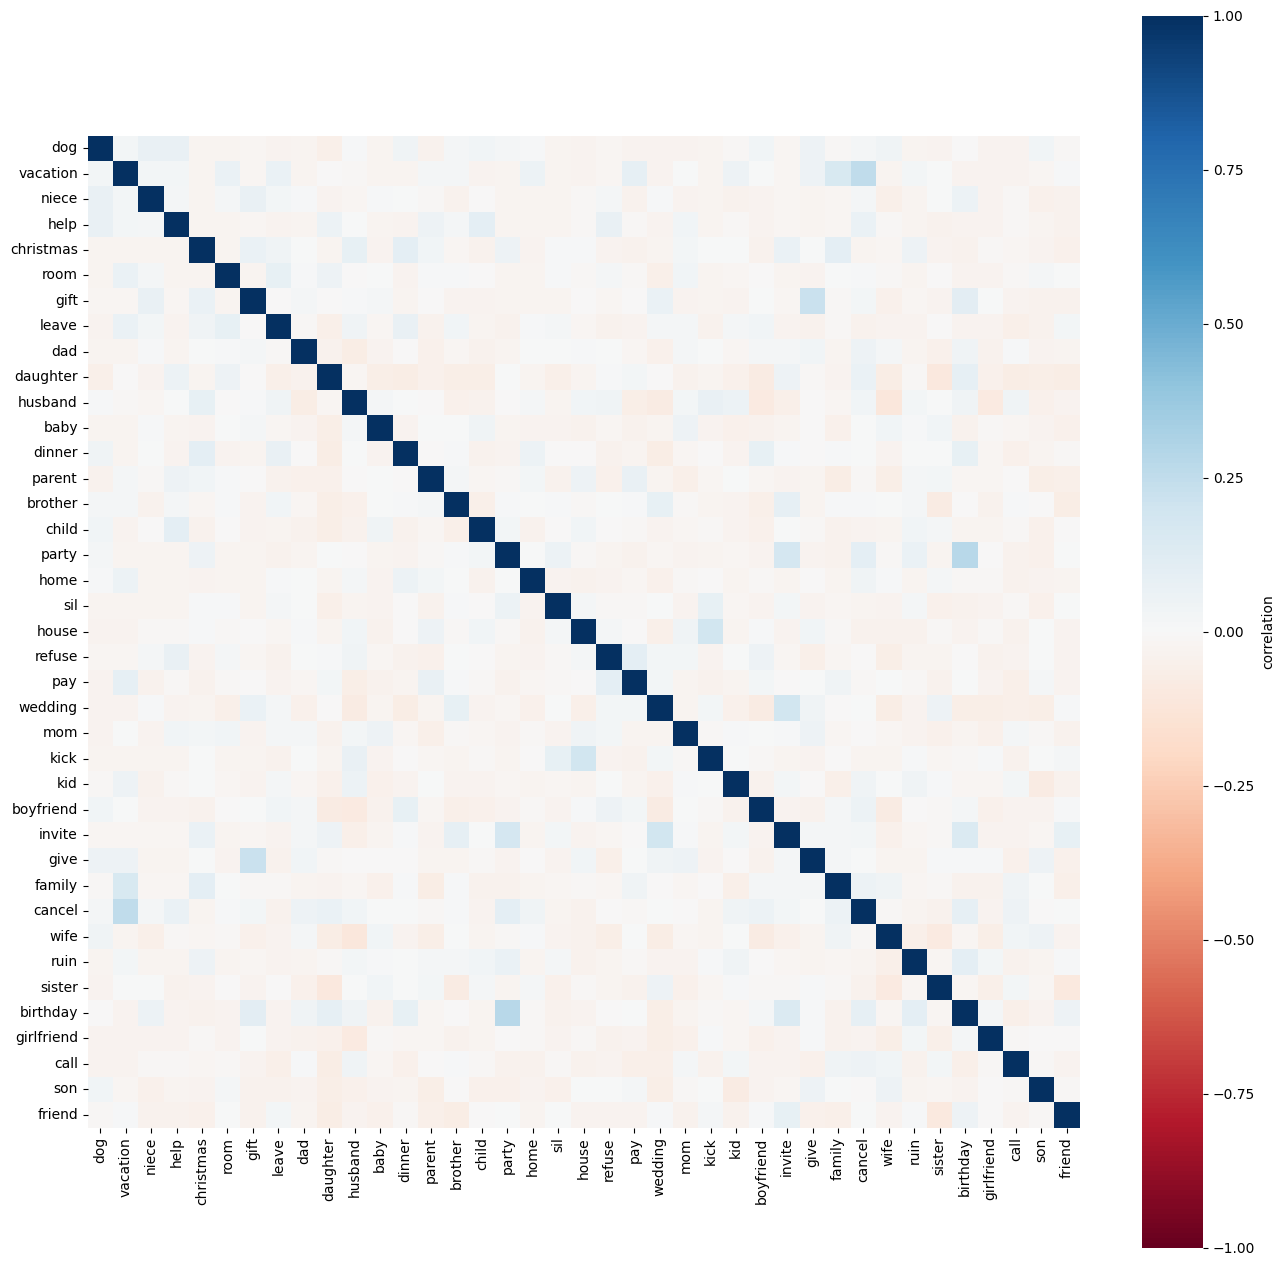

In [28]:
#Visualize

#Drop popular keys column to prepare data for correlation testing
category_matrix = vector_df.drop('popular_keys', axis=1)

# calculate the correlation matrix
correlations = category_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(16,16))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()